In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.utils.data as data
from torchvision import transforms
#from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

import logging
import urllib
import sys
import os
import zipfile
from os.path import join, exists

# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
from nltk.stem import SnowballStemmer
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# function to extract only words, by excluding punctuation and other symbols
def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = contractions.fix(review) #to change words like "don't" to "do not"
    review = re.sub("([^\x00-\x7F])+"," ",review) #removing non-english words
#     review = word_tokenize(review) 
#     review = remove_stop_words(review) #remove stop words
#     review = ' '.join(review)
    return review

def confusion_matrix(cnf_matrix):    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 
def plotting_df(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()  

In [3]:
##Dataset Class extends Pytorch inbuilt Dataset Class


class Arizona(Dataset):
  def __init__(self, file_path, transform=None):
        self.data = file_path
        self.transform = transform
        self.targets = [a for a in self.data.iloc[:,1536]]
        
  def __len__(self):
    return len(self.data)
    
  def __getitem__(self, index):
    sample = self.data.iloc[index, :-1].values.reshape((1,1536))
    label = self.targets[index]
        
    if self.transform is not None:
      sample = self.transform(sample)
            
    return sample,label

In [4]:
## Neural Network architecture is named Network and this extends Pytorch inbuit nn.Module class

class Network(nn.Module):
  def __init__(self):
    super(Network,self).__init__()
    self.out = nn.Linear(in_features=1536,out_features=2)

  def forward(self,t):
    #implement forward pass method
    t = t
    t = t.reshape(-1, 1536) ##dont think this is necessary recheck
    t = self.out(t)
    return t

In [5]:
##Reading back lists with pickle


import pickle

with open('C:/python files/NLP/project/SBERT embeddings/train_q1.data', 'rb') as filehandle:
    # read the data as binary data stream
    train_q1 = pickle.load(filehandle)

In [6]:
##Reading back lists with pickle


import pickle

with open('C:/python files/NLP/project/SBERT embeddings/train_q2.data', 'rb') as filehandle:
    # read the data as binary data stream
    train_q2 = pickle.load(filehandle)

In [7]:
##Reading back lists with pickle


import pickle

with open('C:/python files/NLP/project/SBERT embeddings/test_q1.data', 'rb') as filehandle:
    # read the data as binary data stream
    test_q1 = pickle.load(filehandle)

In [8]:
##Reading back lists with pickle


import pickle

with open('C:/python files/NLP/project/SBERT embeddings/test_q2.data', 'rb') as filehandle:
    # read the data as binary data stream
    test_q2 = pickle.load(filehandle)

In [9]:
##Reading back lists with pickle


import pickle

with open('C:/python files/NLP/project/SBERT embeddings/label_test.data', 'rb') as filehandle:
    # read the data as binary data stream
    label_test = pickle.load(filehandle)


In [10]:
##Reading back lists with pickle


import pickle

with open('C:/python files/NLP/project/SBERT embeddings/label_train.txt', 'rb') as filehandle:
    # read the data as binary data stream
    label_train = pickle.load(filehandle)

In [11]:
import itertools
X_train = [list(itertools.chain.from_iterable([train_q1[i]] + [train_q2[i]])) for i in range(len(train_q1))]
X_test = [list(itertools.chain.from_iterable([test_q1[i]] + [test_q2[i]])) for i in range(len(test_q1))]

In [12]:
y_train = label_train
y_test = label_test

In [13]:
test_df = pd.DataFrame(X_test)
test_df["labels"] = label_test

In [14]:
train= pd.DataFrame(X_train)
train["labels"] = label_train

In [15]:
train_df, val_df = train_test_split(train, test_size=0.1)

In [16]:
train_df.shape

(327521, 1537)

In [17]:
val_df.shape

(36392, 1537)

In [18]:
test_df.shape

(40435, 1537)

In [ ]:
y_train = train_df.labels 
y_test = test_df.labels
y_val = val_df.labels
X_train = train_df.drop(["labels"], axis=1)
X_test = train_df.drop(["labels"], axis=1)
X_val = train_df.drop(["labels"], axis=1)
X_test

In [ ]:
y_train = train_df.labels 
X_train = train_df.drop(["labels"], axis=1)

In [21]:
len(X_train)

363913

In [32]:
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
def undersampleData(train_X, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
    return X_resampled, y_resampled

In [24]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = undersampleData(X_train, y_train)

Train Data Shape: (268972, 1536)
Train Data : 
 1    134486
0    134486
Name: 0, dtype: int64


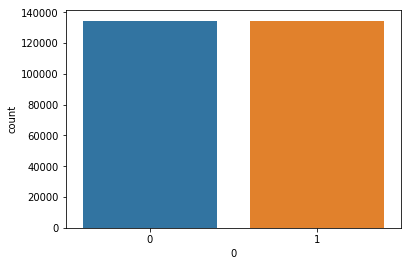

In [34]:
print("Train Data Shape:",X_resampled.shape)
y = pd.DataFrame(y_resampled)
print("Train Data : \n",y[0].value_counts())

sns.countplot(y[0],label="Count")
plt.show()

In [25]:
train_df_sampled = pd.DataFrame(X_resampled)
train_df_sampled["labels"] = y_resampled

In [ ]:
# train_df = df_for_task1(final_sent_embedding,train)

# val_df = df_for_task1(final_sent_embedding_val,validation)

# test_df = df_for_task1(final_sent_embedding_test,test)

In [35]:
train_dataset = Arizona(train_df_sampled,transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=2048)


In [36]:
test_dataset = Arizona(test_df,transform=torchvision.transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=2048)


In [37]:
val_dataset = Arizona(val_df,transform=torchvision.transforms.ToTensor())

val_loader = torch.utils.data.DataLoader(val_dataset,batch_size=2048)


In [38]:
#Creating an instance of Network class which is our model here

## BS : 1024, optimizer : Adam , learning rate = 0.01 , Epochs : 10

variant = Network()

## Creating an optimizer instance and passing it the learning rate

optimizer = optim.Adam(variant.parameters(),lr=0.001)

In [ ]:
## Training and storing the model which performed the best on validation set

## Storing loss and accuracy to plot corresponding graphs


for batch_val in val_loader:
  images_val,labels_val = batch_val

for batch_test in test_loader:
  images_test,labels_test = batch_test

for batch_total in train_loader:
  images_total,labels_total = batch_total

train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []
max_acc_val = 0
for epoch in range(25):
  total_loss = 0
  loss_val = 0
  for batch in train_loader:
    images,labels = batch
    preds = variant(images.float())

    loss = F.cross_entropy(preds,labels)
    

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    total_loss += loss.item()
  preds_val = variant(images_val.float())
  loss_val = F.cross_entropy(preds_val,labels_val)
  loss_val = loss_val.item()
  train_loss.append(total_loss)
  val_loss.append(loss_val)
  train_acc = preds.argmax(dim=1).eq(labels).sum().item()/len(images)
  train_accuracy.append(train_acc)
  val_acc = preds_val.argmax(dim=1).eq(labels_val).sum().item()/len(images_val)
  val_accuracy.append(val_acc)
  if val_acc > max_acc_val: 
    max_acc_val = val_acc
#     torch.save(variant.state_dict(), "/best_variant_model.pth")
    print("saved model now")
  print("epoch: {:.4f}".format(epoch) ," loss: {:.4f}".format(total_loss)," loss_val: {:.4f}".format(loss_val)," train_acc: {:.4f}".format(train_acc)," val_acc: {:.4f}".format(val_acc))


saved model now
epoch: 0.0000  loss: 49.5688  loss_val: 9.3138  train_acc: 1.0000  val_acc: 0.3915
epoch: 1.0000  loss: 278.3271  loss_val: 9.6057  train_acc: 1.0000  val_acc: 0.3915
epoch: 2.0000  loss: 296.9583  loss_val: 9.0266  train_acc: 1.0000  val_acc: 0.3915


In [ ]:
def plotting(loss_val,total_loss,train_acc,val_acc):
#     print(loss_val)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(total_loss)
    plt.plot(loss_val)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show() 

In [ ]:
# train_loss = []
# val_loss = []
# train_accuracy = []
# val_accuracy =
plotting(val_loss,train_loss,train_accuracy,val_accuracy)

In [ ]:
# preds_total = variant1(images_total.float())

In [23]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 

In [ ]:
# ## Classification Report for a single batch of samples from train set

from sklearn.metrics import classification_report
# target_names = ['CONTRADICTION', 'NEUTRAL', 'ENTAILMENT']
# print(classification_report(labels.numpy(),preds.argmax(dim=1).numpy(), target_names=target_names))


# ## Passing complete train loader to the model for train predictions

preds_total = variant(images_total.float())


# Classification Report for Complete Train set

from sklearn.metrics import classification_report
target_names = [0,1]
print(classification_report(labels_total,preds_total.argmax(dim=1)))

In [ ]:
preds_test = variant(images_test.float())



In [ ]:
from sklearn.metrics import classification_report
# target_names = [0,1]
print(classification_report(labels_test,preds_test.argmax(dim=1)))

In [ ]:
cnf_matrix = metrics.confusion_matrix(labels_test,preds_test.argmax(dim=1))
confusion_matrix(cnf_matrix)